### 1. Import Dependencies

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

2. Load Dataset

In [3]:
data = pd.read_csv('synthetic_text_data.csv')
X = data['text']
y = data['label']

data.head()


,text,label
0,Artificial intelligence is advancing in health...,Technology
1,Football fans are excited about the upcoming W...,Sports
2,New policies regarding climate change have spa...,Politics
3,The latest blockbuster movie has shattered box...,Entertainment
4,Quantum computing promises to revolutionize in...,Technology


### 3. Splitting the Data

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

### 4. Text Processing: Converting Text to Numeric Features
- CountVectorizer() : แปลงข้อความดิบให้เป็นเมทริกซ์นับจำนวนคำ
- fit_transform() : เรียนรู้คำศัพท์จากข้อมูลฝึกฝนและแปลงข้อความให้เป็นเวกเตอร์
- transform():นำคำศัพท์ที่เรียนรู้จากข้อมูลฝึกฝนไปใช้กับข้อมูลทดสอบ

In [5]:
vectorizer = CountVectorizer()
X_trian_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [7]:
model = MultinomialNB()
model.fit(X_trian_vec, y_train)

,"alpha alpha: float or array-like of shape (n_features,), default=1.0Additive (Laplace/Lidstone) smoothing parameter(set alpha=0 and force_alpha=True, for no smoothing).",1.0
,"force_alpha force_alpha: bool, default=TrueIf False and alpha is less than 1e-10, it will set alpha to1e-10. If True, alpha will remain unchanged. This may causenumerical errors if alpha is too close to 0... versionadded:: 1.2.. versionchanged:: 1.4 The default value of `force_alpha` changed to `True`.",True
,"fit_prior fit_prior: bool, default=TrueWhether to learn class prior probabilities or not.If false, a uniform prior will be used.",True
,"class_prior class_prior: array-like of shape (n_classes,), default=NonePrior probabilities of the classes. If specified, the priors are notadjusted according to the data.",None


### 6. Prediction

In [8]:
y_pred = model.predict(X_test_vec)

### 7. Evaluate Model

In [12]:
acc = accuracy_score(y_test, y_pred)
conf = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {round(acc * 100)} %')

Accuracy: 88 %


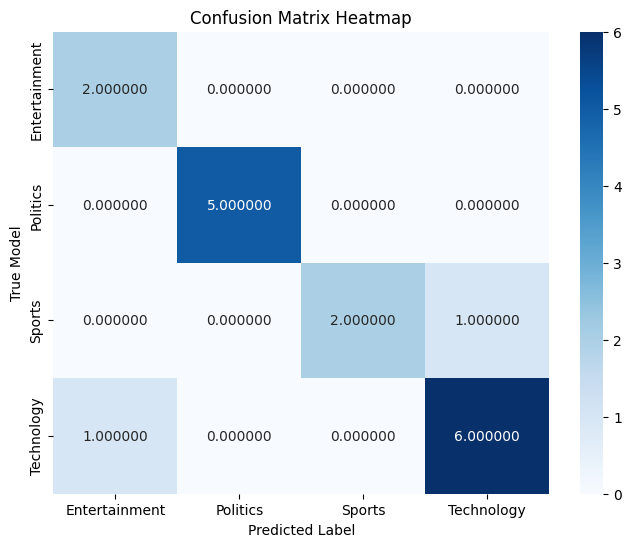

In [15]:
class_labels = np.unique(y_test)

plt.figure(figsize=(8, 6))
sns.heatmap(conf, annot=True, fmt='f', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Label')
plt.ylabel('True Model')
plt.show()


### 8. Prediction on Unseen data

In [18]:
run = True
while run == True:
    user_input = str(input("Enter Some Sentence: "))

    if user_input == 'q':
        run = False
    
    input_vec = vectorizer.transform([user_input])
    predicted_label = model.predict(input_vec)
    print(f"This is about: {predicted_label[0]}")



This is about: Technology
This is about: Sports
This is about: Technology
This is about: Technology
